In [28]:
import glob
import numpy as np
from ipywidgets import interact
import numpy as np
import SimpleITK as sitk

In [29]:
module_root = '..'
import sys,os
sys.path.append(module_root)
from project.settings import intermediate_folder
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data_uid = '2017_03_06_21_57'
network_uid = '2017_03_07_15_21_49_unet'
fold = '0'
imgs = np.load(os.path.join(intermediate_folder, 'npy',data_uid, fold, 'validation.npy'))
labels = np.load(os.path.join(intermediate_folder, 'npy',data_uid, fold, 'validation_labels.npy'))
predictions = np.load(os.path.join(intermediate_folder, 'val_prediction',network_uid+ '.npy'))

In [31]:
print(predictions.shape)
print(labels.shape)

(198, 2, 164, 164)
(198, 2, 164, 164)


In [45]:
def browse_data(imgs,labels,predictions):
    n = imgs.shape[0]
    def view_image(sample):
        fig = plt.figure(figsize=(12, 12));
        plt.subplot(131)
        ax = plt.imshow(imgs[sample,0,:,:],cmap=plt.cm.gray, interpolation='none')
        plt.subplot(132)
        ax = plt.imshow(imgs[sample,0,92:-92,92:-92],cmap=plt.cm.gray)
        ax = plt.imshow(labels[sample,0,:,:],cmap=plt.cm.Reds,alpha=0.3)
        ax = plt.imshow(labels[sample,1,:,:],cmap=plt.cm.Greens,alpha=0.3)
        plt.subplot(133)
        ax = plt.imshow(imgs[sample,0,92:-92,92:-92],cmap=plt.cm.gray)
        ax = plt.imshow(predictions[sample,0,:,:],cmap=plt.cm.Reds,alpha=0.3)
        ax = plt.imshow(predictions[sample,1,:,:],cmap=plt.cm.Greens,alpha=0.3)
    interact(view_image, sample=(0,n-1))

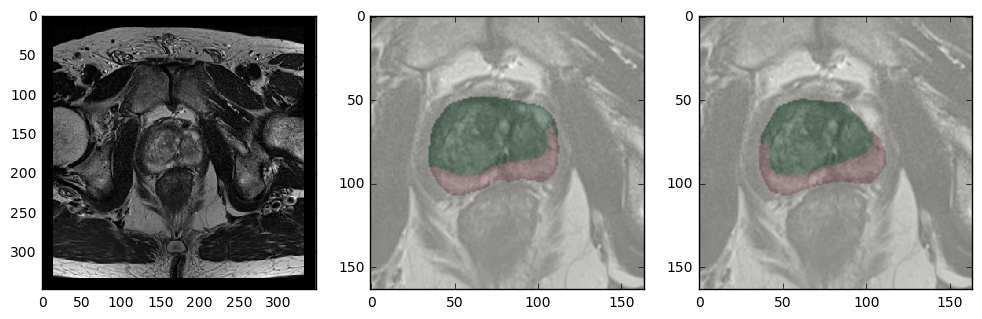

In [46]:
browse_data(imgs,labels, predictions)

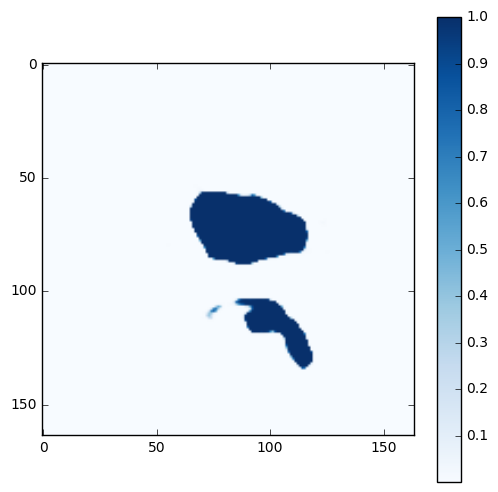

In [48]:
fig = plt.figure(figsize=(6, 6));
ax = plt.imshow(predictions[0,1,:,:],cmap=plt.cm.Blues)
fig.colorbar(ax)